#**Movie Rating Prediction**

In [222]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [223]:
#reading the dataset

df=pd.read_csv("/content/drive/MyDrive/IMDb Movies India.csv",encoding='ISO-8859-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [224]:
#rows 15509 and columns are 10

df.shape

(15509, 10)

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [226]:
df.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [227]:
#checking null values

df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

Lot of null values are present

Droping null values

In [228]:
df.dropna(subset=['Rating'], inplace=True)
df.isnull().sum().sort_values(ascending=False)

Duration    2068
Actor 3      292
Actor 2      200
Actor 1      125
Genre        102
Director       5
Name           0
Year           0
Rating         0
Votes          0
dtype: int64

In [229]:
df.dropna(subset=['Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Genre'], inplace=True)
df.isnull().sum().sort_values(ascending=False)

Duration    1899
Name           0
Year           0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [230]:
df['Duration'] = pd.to_numeric(df['Duration'].str.strip(' min'))
df['Duration'].fillna(df['Duration'].mean(), inplace=True)

df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

Droping duplicates

In [231]:
df.drop_duplicates(inplace=True)
df.shape

(7558, 10)

In [232]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [233]:
df['Year'] = df['Year'].apply(lambda x: x.split(')')[0])

year_lst = []
for val in df['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
df['Year'] = year_lst

In [234]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [235]:
df.Votes.unique

<bound method Series.unique of 1            8
3           35
5          827
6        1,086
8          326
         ...  
15501      135
15503       44
15504       11
15505      655
15508       20
Name: Votes, Length: 7558, dtype: object>

In [236]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(int)
df['Year'] = df['Year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7558 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7558 non-null   object 
 1   Year      7558 non-null   int64  
 2   Duration  7558 non-null   float64
 3   Genre     7558 non-null   object 
 4   Rating    7558 non-null   float64
 5   Votes     7558 non-null   int64  
 6   Director  7558 non-null   object 
 7   Actor 1   7558 non-null   object 
 8   Actor 2   7558 non-null   object 
 9   Actor 3   7558 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 649.5+ KB


**Exploratory Data Analysis**

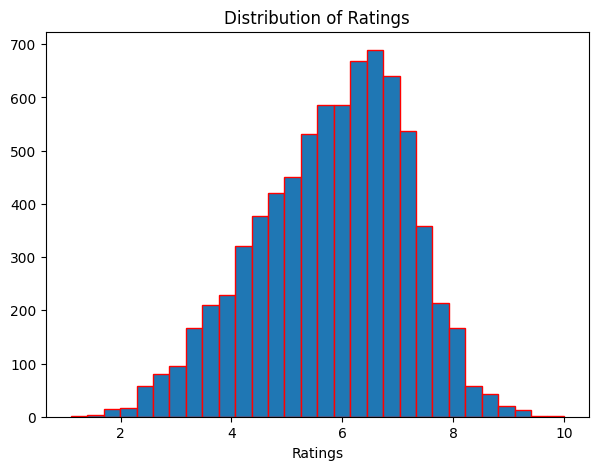

In [238]:
plt.figure(figsize=(7,5))
plt.title("Distribution of Ratings")
plt.xlabel("Ratings")
plt.hist(df['Rating'],bins=30,edgecolor='red')
plt.show()

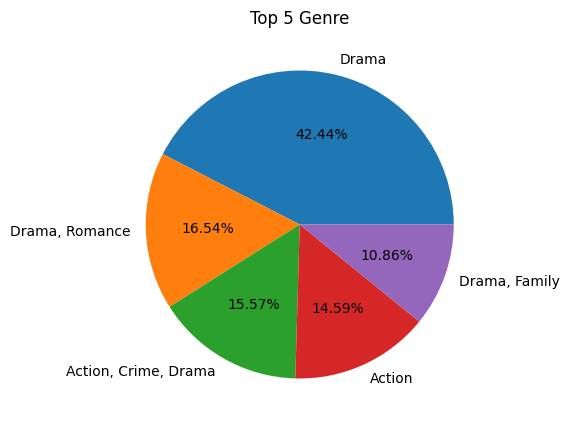

In [239]:
genre=df['Genre'].value_counts().reset_index()
genre=genre.sort_values(by='Genre',ascending=False)
a=genre.head()
plt.figure(figsize=(7,5))
plt.title("Top 5 Genre")
plt.pie(a['Genre'],labels=a['index'],autopct='%1.2f%%')
plt.show()

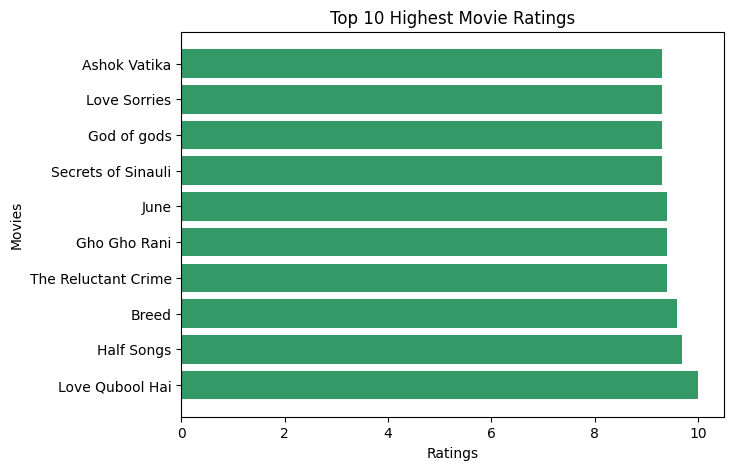

In [240]:
movie_rating=df[['Name','Rating']]
movie_rating=movie_rating.sort_values(by='Rating',ascending=False)
movie_rating=movie_rating.head(10)
plt.figure(figsize=(7,5))
plt.title("Top 10 Highest Movie Ratings")
plt.xlabel('Ratings')
plt.ylabel('Movies')
plt.barh(movie_rating['Name'],movie_rating['Rating'],color='#339966')
plt.show()

<Axes: title={'center': 'Distribution of Votes'}, xlabel='Votes', ylabel='Density'>

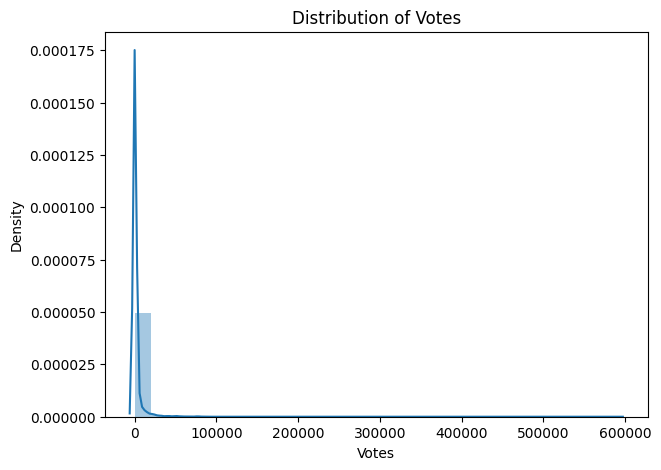

In [241]:
plt.figure(figsize=(7,5))
plt.title("Distribution of Votes")
plt.xlabel('Votes')
sns.distplot(df['Votes'],bins=30)

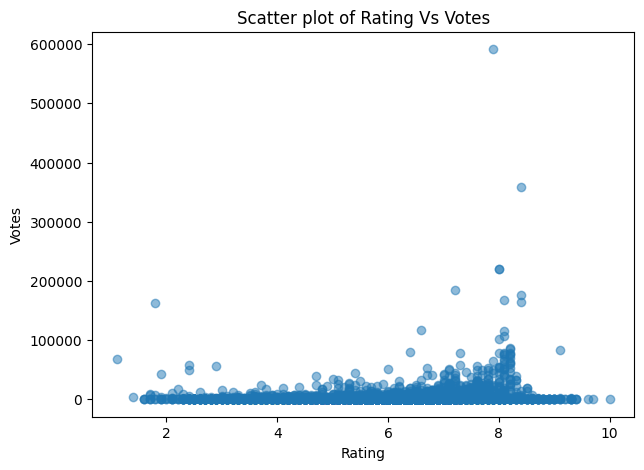

In [242]:
plt.figure(figsize=(7,5))
plt.title("Scatter plot of Rating Vs Votes")
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.scatter(df['Rating'],df['Votes'],alpha=0.5)
plt.show()

<Axes: title={'center': 'Correlation Heatmap'}>

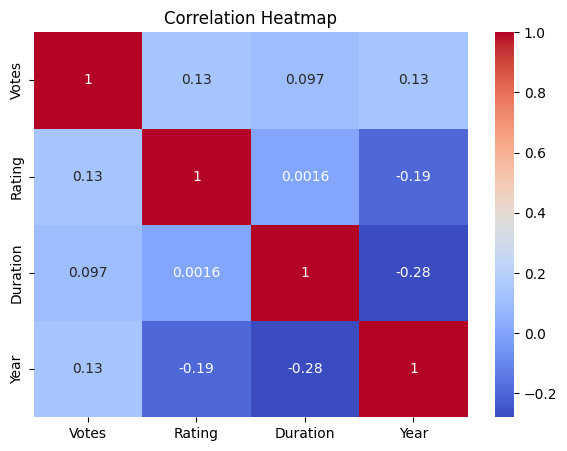

In [243]:
numerical_column=['Votes','Rating','Duration','Year']
cor_mat=df[numerical_column].corr()
plt.figure(figsize=(7,5))
plt.title("Correlation Heatmap")
sns.heatmap(cor_mat,annot=True,cmap='coolwarm')

for how many Directors you want to see :5


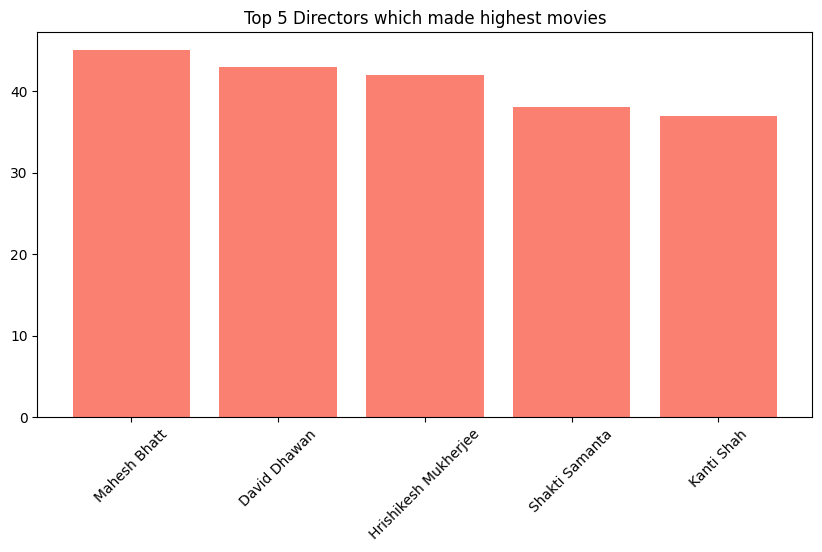

In [244]:
direct=df['Director'].value_counts().reset_index()
direct=direct.sort_values(by='Director',ascending=False)
e=int(input("for how many Directors you want to see :"))
d=direct.head(e)
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.title(f"Top {e} Directors which made highest movies")
plt.bar(d['index'],d['Director'],color='#fa8072')
plt.show()

In [245]:
actor1 = df.groupby('Actor 1').agg({'Rating': 'mean'}).to_dict()
actor2 = df.groupby('Actor 2').agg({'Rating': 'mean'}).to_dict()
actor3 = df.groupby('Actor 3').agg({'Rating': 'mean'}).to_dict()
director = df.groupby('Director').agg({'Rating': 'mean'}).to_dict()
genre = df.groupby('Genre').agg({'Rating': 'mean'}).to_dict()

In [246]:
df.head(2)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [247]:
df = df.rename(columns={'Actor 1': 'Actor1'})

In [248]:
df[df['Actor1']=='Rasika Dugal']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
7876,Kshay,2011,92.0,Drama,6.7,302,Karan Gour,Rasika Dugal,Alekh Sangal,Sudhir Pednekar


In [249]:
df['actor1_encoded'] = round(df['Actor1'].map(actor1['Rating']),1)
df['actor2_encoded'] = round(df['Actor 2'].map(actor2['Rating']),1)
df['actor3_encoded'] = round(df['Actor 3'].map(actor3['Rating']),1)
df['director_encoded'] = round(df['Director'].map(director['Rating']),1)
df['genre_encoded'] = round(df['Genre'].map(genre['Rating']),1)

In [250]:
df.drop(['Actor1', 'Actor 2', 'Actor 3', 'Director', 'Genre','Name'], axis=1, inplace=True)
df.head()

,Year,Duration,Rating,Votes,actor1_encoded,actor2_encoded,actor3_encoded,director_encoded,genre_encoded
1,2019,109.0,7.0,8,6.8,7.0,7.0,7.0,6.3
3,2019,110.0,4.4,35,5.4,4.4,4.4,4.4,5.7
5,1997,147.0,4.7,827,4.8,5.8,5.8,5.4,6.2
6,2005,142.0,7.4,1086,5.3,6.0,6.5,7.5,6.8
8,2012,82.0,5.6,326,5.6,5.9,5.6,5.6,5.5


**assigining the variables**

In [251]:
x=df.drop('Rating',axis=1)
y=df['Rating']

**Dividing the dataset into train and test data**

In [252]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [253]:
x_train.shape,y_train.shape

((6046, 8), (6046,))

In [254]:
x_test.shape,y_test.shape

((1512, 8), (1512,))

**LinearRegression Model**

In [255]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [256]:
print('R^2: ', r2_score(y_test, y_pred))
print('MAE: ',mean_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R^2:  0.7742634387401234
MAE:  0.4827094295071443
MSE:  0.4158054841258666
RMSE:  0.6448298102025577


#**Result :**LinearRegression Model performing really well, scoring 77% on the test data. This means it's good at making accurate predictions